In [1]:
import requests
import pandas as pd
import numpy as np
import random
!conda install -c conda-forge geopy --yes

from geopy.geocoders import Nominatim

from IPython.display import Image
from IPython.core.display import HTML

from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

   

###  Download and Explore Dataset

As only have data for New York city, need extract Manhatton and its neighborhoods.

New York City data has a total of 5 boroughs and 306 neighborhoods. This data can be downloaded by a wget command.

In [2]:
import json

In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


### load and explore the data

In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']

### transform the data into pandas dataframe

In [5]:
# create an empty dataframe and define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
# loop through the data and fill the dataframe one row at a time.
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
# make sure that the dataset has all 5 boroughs and 306 neighborhoods.
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [8]:
neighborhoods['Borough'].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'], dtype=object)

In [9]:
### get Manhatton data and its neighborhoods
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data['Neighborhood']

0             Marble Hill
1               Chinatown
2      Washington Heights
3                  Inwood
4        Hamilton Heights
5          Manhattanville
6          Central Harlem
7             East Harlem
8         Upper East Side
9               Yorkville
10             Lenox Hill
11       Roosevelt Island
12        Upper West Side
13         Lincoln Square
14                Clinton
15                Midtown
16            Murray Hill
17                Chelsea
18      Greenwich Village
19           East Village
20        Lower East Side
21                Tribeca
22           Little Italy
23                   Soho
24           West Village
25       Manhattan Valley
26    Morningside Heights
27               Gramercy
28      Battery Park City
29     Financial District
30          Carnegie Hill
31                   Noho
32           Civic Center
33          Midtown South
34           Sutton Place
35             Turtle Bay
36             Tudor City
37        Stuyvesant Town
38          

### explore the neighborhoods of Manhatton in our dataframe.¶

In [10]:
# take Chinatown as example
manhattan_data.loc[1, 'Neighborhood']

'Chinatown'

In [11]:
neighborhood_latitude = manhattan_data.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[1, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[1, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Chinatown are 40.71561842231432, -73.99427936255978.


In [12]:
latitude=neighborhood_latitude
longitude=neighborhood_longitude
print(latitude, longitude)

40.7156184223 -73.9942793626


### define Foursqaure Credentials and Version

In [13]:
CLIENT_ID='NJRSXVNOTDDCBED4NVHAVELBRQQBOBVPFGOFE1GKEEFEA5NM'
CLIENT_SECRET='BFF112510HZCUF43ZLUPHWU2RPZZZSNGXHIQKOA3KP2TTY5B'
VERSION='20190610'
LIMIT=200
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NJRSXVNOTDDCBED4NVHAVELBRQQBOBVPFGOFE1GKEEFEA5NM
CLIENT_SECRET:BFF112510HZCUF43ZLUPHWU2RPZZZSNGXHIQKOA3KP2TTY5B


In [14]:
## take one neighborhood as example to track all store
radius=500

In [15]:
url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    latitude, 
    longitude, 
    VERSION,  
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=NJRSXVNOTDDCBED4NVHAVELBRQQBOBVPFGOFE1GKEEFEA5NM&client_secret=BFF112510HZCUF43ZLUPHWU2RPZZZSNGXHIQKOA3KP2TTY5B&ll=40.71561842231432,-73.99427936255978&v=20190610&radius=500&limit=200'

In [16]:
## get the result for the request and transform it into a pandas dataframe
results=requests.get(url).json()

In [17]:
venues=results['response']['groups'][0]['items']
venues_df=json_normalize(venues)

In [18]:
venues_df.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.delivery.id,venue.delivery.provider.icon.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.name,venue.delivery.url,...,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'reasonName': 'globalInteractionReason', 'ty...",e-0-578692f4498e1054905dbde7-0,[{'icon': {'prefix': 'https://ss3.4sqi.net/img...,NaN,NaN,NaN,NaN,NaN,NaN,...,"[{'lng': -73.9967894, 'label': 'display', 'lat...",40.715936,-73.996789,NaN,10013,NY,Hotel 50 Bowery NYC,0,[],NaN
1,0,"[{'reasonName': 'globalInteractionReason', 'ty...",e-0-5521c2ff498ebe2368634187-1,[{'icon': {'prefix': 'https://ss3.4sqi.net/img...,625337,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/kikis-130-divisi...,...,"[{'lng': -73.99203609673215, 'label': 'display...",40.714476,-73.992036,Chinatown,10002,NY,Kiki's,0,[],NaN
2,0,"[{'reasonName': 'globalInteractionReason', 'ty...",e-0-503fffabe4b05e5c0eace385-2,[{'icon': {'prefix': 'https://ss3.4sqi.net/img...,NaN,NaN,NaN,NaN,NaN,NaN,...,"[{'lng': -73.99180174375184, 'label': 'display...",40.715135,-73.991802,NaN,10002,NY,Bar Belly,0,[],36721062
3,0,"[{'reasonName': 'globalInteractionReason', 'ty...",e-0-4db3374590a0843f295fb69b-3,[{'icon': {'prefix': 'https://ss3.4sqi.net/img...,NaN,NaN,NaN,NaN,NaN,NaN,...,"[{'lng': -73.99353, 'label': 'display', 'lat':...",40.717010,-73.993530,Lower East Side,10002,NY,Spicy Village,0,[],39017861
4,0,"[{'reasonName': 'globalInteractionReason', 'ty...",e-0-537ae03e498eddb91b359eb8-4,[{'icon': {'prefix': 'https://ss3.4sqi.net/img...,NaN,NaN,NaN,NaN,NaN,NaN,...,"[{'lng': -73.99472010554504, 'label': 'display...",40.716505,-73.994720,NaN,10002,NY,Mission Escape Games,0,[],86349052


In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
venues_df =venues_df.loc[:, filtered_columns]

# filter the category for each row
venues_df['venue.categories'] = venues_df.apply(get_category_type, axis=1)

# clean columns
venues_df.columns = [col.split(".")[-1] for col in venues_df.columns]

venues_df.head()

,name,categories,lat,lng
0,Hotel 50 Bowery NYC,Hotel,40.715936,-73.996789
1,Kiki's,Greek Restaurant,40.714476,-73.992036
2,Bar Belly,Cocktail Bar,40.715135,-73.991802
3,Spicy Village,Chinese Restaurant,40.717010,-73.993530
4,Mission Escape Games,General Entertainment,40.716505,-73.994720


###  repeat the same process to all the neighborhoods in Manhattan

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&r3329adius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Latitude', 
                  'Longitude', 
                  'Category']
    
    return(nearby_venues)
        
  

In [21]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [22]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3996, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Latitude,Longitude,Category
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [23]:
manhattan_venues['Category'].value_counts()

Coffee Shop                     149
Italian Restaurant              144
Pizza Place                     106
Café                             92
Bakery                           92
American Restaurant              91
Park                             86
Mexican Restaurant               78
Gym                              76
Hotel                            73
Cocktail Bar                     69
Gym / Fitness Center             67
Chinese Restaurant               61
Wine Shop                        60
Bar                              60
Spa                              59
Sushi Restaurant                 58
Japanese Restaurant              57
French Restaurant                56
Wine Bar                         51
Yoga Studio                      47
Ice Cream Shop                   46
Deli / Bodega                    45
Sandwich Place                   44
Seafood Restaurant               43
Indian Restaurant                42
Grocery Store                    42
Cosmetics Shop              

In [24]:
# keep rows that contain "Restaurant"
manhattan_restaurant=manhattan_venues[manhattan_venues.Category.str.contains('Restaurant')]
#drop category only contains restaurant
manhattan_restaurant=manhattan_restaurant[~manhattan_venues.Category.str.startswith('Restaurant')]
manhattan_restaurant=manhattan_restaurant[~manhattan_venues.Category.str.startswith('Seafood Restaurant')]

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [25]:
manhattan_restaurant['Category'].value_counts()

Italian Restaurant                 144
American Restaurant                 91
Mexican Restaurant                  78
Chinese Restaurant                  61
Sushi Restaurant                    58
Japanese Restaurant                 57
French Restaurant                   56
Indian Restaurant                   42
Thai Restaurant                     38
Latin American Restaurant           34
Mediterranean Restaurant            32
Vegetarian / Vegan Restaurant       28
Spanish Restaurant                  27
New American Restaurant             24
Greek Restaurant                    23
Ramen Restaurant                    21
Korean Restaurant                   20
Vietnamese Restaurant               17
Asian Restaurant                    16
Cuban Restaurant                    15
Tapas Restaurant                    14
Southern / Soul Food Restaurant     14
Caribbean Restaurant                13
Middle Eastern Restaurant           11
Ethiopian Restaurant                 9
Falafel Restaurant       

In [26]:
manhattan_restaurant['Category']=manhattan_restaurant['Category'].replace("Asian Restaurant", "Chinese Restaurant")
manhattan_restaurant['Category']=manhattan_restaurant['Category'].replace("Dumpling Restaurant", "Chinese Restaurant")
manhattan_restaurant['Category']=manhattan_restaurant['Category'].replace("Shanghai Restaurant", "Chinese Restaurant")
manhattan_restaurant['Category']=manhattan_restaurant['Category'].replace("Hotpot Restaurant", "Chinese Restaurant")
manhattan_restaurant['Category']=manhattan_restaurant['Category'].replace("Taiwanese Restaurant", "Chinese Restaurant")
manhattan_restaurant['Category']=manhattan_restaurant['Category'].replace("Sushi Restaurant", "Japanese Restaurant")
manhattan_restaurant['Category']=manhattan_restaurant['Category'].replace("Ramen Restaurant", "Japanese Restaurant")
manhattan_restaurant['Category']=manhattan_restaurant['Category'].replace("Japanese Curry Restaurant", "Japanese Restaurant")
manhattan_restaurant['Category']=manhattan_restaurant['Category'].replace("Cantonese Restaurant", "Japanese Restaurant")
manhattan_restaurant['Category']=manhattan_restaurant['Category'].replace("Latin American Restaurant", "Mexican Restaurant")
manhattan_restaurant['Category']=manhattan_restaurant['Category'].replace("Dim Sum Restaurant", "Chinese Restaurant")


manhattan_restaurant['Category'].value_counts()

Italian Restaurant                 144
Japanese Restaurant                140
Mexican Restaurant                 112
Chinese Restaurant                  95
American Restaurant                 91
French Restaurant                   56
Indian Restaurant                   42
Thai Restaurant                     38
Mediterranean Restaurant            32
Vegetarian / Vegan Restaurant       28
Spanish Restaurant                  27
New American Restaurant             24
Greek Restaurant                    23
Korean Restaurant                   20
Vietnamese Restaurant               17
Cuban Restaurant                    15
Tapas Restaurant                    14
Southern / Soul Food Restaurant     14
Caribbean Restaurant                13
Middle Eastern Restaurant           11
Falafel Restaurant                   9
Ethiopian Restaurant                 9
Peruvian Restaurant                  7
African Restaurant                   5
Turkish Restaurant                   5
Hawaiian Restaurant      

In [27]:
manhattan_restaurant[manhattan_restaurant['Category']== "Chinese Restaurant"]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Latitude,Longitude,Category
103,Chinatown,40.715618,-73.994279,Spicy Village,40.717010,-73.993530,Chinese Restaurant
114,Chinatown,40.715618,-73.994279,Xi'an Famous Foods,40.715232,-73.997263,Chinese Restaurant
120,Chinatown,40.715618,-73.994279,Wah Fung Number 1 Fast Food 華豐快飯店,40.717278,-73.994177,Chinese Restaurant
129,Chinatown,40.715618,-73.994279,Little Sheep Mongolian Hot Pot,40.717639,-73.995187,Chinese Restaurant
133,Chinatown,40.715618,-73.994279,Ling Kee,40.714713,-73.991538,Chinese Restaurant
139,Chinatown,40.715618,-73.994279,Simple,40.718145,-73.991988,Chinese Restaurant
141,Chinatown,40.715618,-73.994279,Shanghai Dumpling,40.717296,-73.997356,Chinese Restaurant
147,Chinatown,40.715618,-73.994279,Joe's Shanghai 鹿嗚春,40.714692,-73.997701,Chinese Restaurant
151,Chinatown,40.715618,-73.994279,Great N.Y. Noodletown,40.715039,-73.996941,Chinese Restaurant
162,Chinatown,40.715618,-73.994279,99 Favor Taste 99號餐廳,40.717560,-73.992580,Chinese Restaurant


In [28]:
import matplotlib.pyplot as plt; plt.rcdefaults()

In [29]:
manhattan_restaurant.Neighborhood.unique()

array(['Marble Hill', 'Chinatown', 'Washington Heights', 'Inwood',
       'Hamilton Heights', 'Manhattanville', 'Central Harlem',
       'East Harlem', 'Upper East Side', 'Yorkville', 'Lenox Hill',
       'Roosevelt Island', 'Upper West Side', 'Lincoln Square', 'Clinton',
       'Midtown', 'Murray Hill', 'Chelsea', 'Greenwich Village',
       'East Village', 'Lower East Side', 'Tribeca', 'Little Italy',
       'Soho', 'West Village', 'Manhattan Valley', 'Morningside Heights',
       'Gramercy', 'Battery Park City', 'Financial District',
       'Carnegie Hill', 'Noho', 'Civic Center', 'Midtown South',
       'Sutton Place', 'Turtle Bay', 'Tudor City', 'Stuyvesant Town',
       'Flatiron', 'Hudson Yards'], dtype=object)

In [30]:
manhattan_restaurant['Neighborhood'].value_counts()

Chinatown              41
Turtle Bay             37
Tudor City             36
East Village           35
Greenwich Village      35
Morningside Heights    34
Murray Hill            33
Hamilton Heights       33
Central Harlem         32
West Village           32
Washington Heights     32
Noho                   32
Lower East Side        31
Manhattanville         31
East Harlem            31
Upper West Side        31
Manhattan Valley       30
Yorkville              30
Flatiron               29
Sutton Place           29
Stuyvesant Town        27
Midtown South          27
Lenox Hill             27
Midtown                26
Civic Center           25
Gramercy               24
Little Italy           24
Carnegie Hill          23
Inwood                 22
Clinton                22
Upper East Side        21
Marble Hill            21
Tribeca                21
Chelsea                21
Hudson Yards           20
Roosevelt Island       19
Financial District     17
Soho                   17
Lincoln Squa

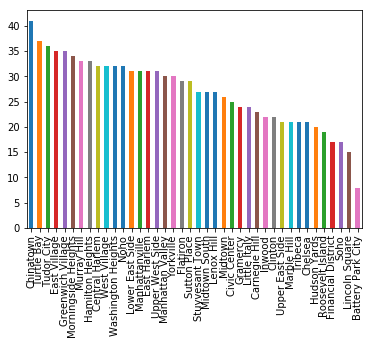

In [31]:
manhattan_restaurant['Neighborhood'].value_counts().plot('bar')

In [32]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_restaurant[['Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cambodian Restaurant,...,Spanish Restaurant,Swiss Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
5,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cambodian Restaurant,...,Spanish Restaurant,Swiss Restaurant,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,Battery Park City,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000
1,Carnegie Hill,0.000000,0.000000,0.086957,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.043478,0.000000,0.086957
2,Central Harlem,0.000000,0.125000,0.093750,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.031250,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chelsea,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.095238,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000
4,Chinatown,0.000000,0.000000,0.097561,0.000000,0.000000,0.000000,0.02439,0.000000,0.000000,...,0.024390,0.000000,0.000000,0.000000,0.024390,0.000000,0.000000,0.024390,0.000000,0.048780
5,Civic Center,0.000000,0.000000,0.120000,0.000000,0.000000,0.040000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000
6,Clinton,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.045455,0.000000,0.000000
7,East Harlem,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.064516,0.000000,0.000000,0.000000,0.161290,0.000000,0.000000,0.032258,0.000000,0.000000
8,East Village,0.000000,0.000000,0.028571,0.028571,0.028571,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.028571,0.000000,0.028571,0.000000,0.000000,0.000000,0.085714,0.000000,0.057143
9,Financial District,0.000000,0.000000,0.117647,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [34]:
manhattan_grouped.shape

(40, 66)

In [35]:
num_top_venues = 10

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
                             venue  freq
0               Italian Restaurant  0.38
1               Mexican Restaurant  0.12
2              American Restaurant  0.12
3    Vegetarian / Vegan Restaurant  0.12
4              Japanese Restaurant  0.12
5         Mediterranean Restaurant  0.12
6  Molecular Gastronomy Restaurant  0.00
7             Pakistani Restaurant  0.00
8                Paella Restaurant  0.00
9          New American Restaurant  0.00


----Carnegie Hill----
                      venue  freq
0       Japanese Restaurant  0.17
1        Italian Restaurant  0.17
2     Vietnamese Restaurant  0.09
3       American Restaurant  0.09
4         Indian Restaurant  0.09
5         French Restaurant  0.09
6        Chinese Restaurant  0.04
7  Mediterranean Restaurant  0.04
8        Mexican Restaurant  0.04
9         German Restaurant  0.04


----Central Harlem----
                             venue  freq
0  Southern / Soul Food Restaurant  0.16
1               Af

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Italian Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,American Restaurant,Mexican Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
1,Carnegie Hill,Italian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Indian Restaurant,American Restaurant,French Restaurant,German Restaurant,Mexican Restaurant,Chinese Restaurant,Mediterranean Restaurant
2,Central Harlem,Southern / Soul Food Restaurant,African Restaurant,American Restaurant,Japanese Restaurant,French Restaurant,Mexican Restaurant,Chinese Restaurant,Tapas Restaurant,Caribbean Restaurant,Indian Restaurant
3,Chelsea,Italian Restaurant,American Restaurant,Chinese Restaurant,Japanese Restaurant,Tapas Restaurant,French Restaurant,Israeli Restaurant,Vegetarian / Vegan Restaurant,Paella Restaurant,Indian Restaurant
4,Chinatown,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Japanese Restaurant,Malay Restaurant,Thai Restaurant,Italian Restaurant,New American Restaurant,Spanish Restaurant,Austrian Restaurant


In [38]:
from sklearn.cluster import KMeans
ss=[]
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(manhattan_grouped.iloc[:,1:69])
    ss.append(km.inertia_)

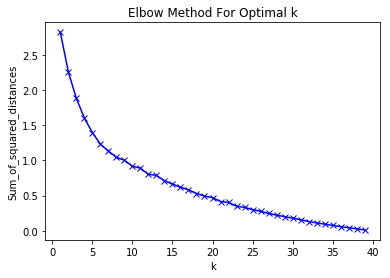

In [39]:
plt.plot(K, ss, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [40]:
kclusters = 5

In [41]:
manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 1, 4, 0, 4, 4, 2, 1, 1], dtype=int32)

In [42]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster', kmeans.labels_)

manhattan_merged = manhattan_data

# merge to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Mexican Restaurant,Japanese Restaurant,Thai Restaurant,Cuban Restaurant,Spanish Restaurant,Greek Restaurant,Caribbean Restaurant,Italian Restaurant,Tapas Restaurant,American Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Japanese Restaurant,Malay Restaurant,Thai Restaurant,Italian Restaurant,New American Restaurant,Spanish Restaurant,Austrian Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,2,Mexican Restaurant,Spanish Restaurant,Tapas Restaurant,Chinese Restaurant,Japanese Restaurant,New American Restaurant,Middle Eastern Restaurant,Cuban Restaurant,Italian Restaurant,American Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,2,Mexican Restaurant,Spanish Restaurant,Japanese Restaurant,Chinese Restaurant,Mediterranean Restaurant,American Restaurant,Venezuelan Restaurant,Tapas Restaurant,Falafel Restaurant,Fast Food Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,1,Mexican Restaurant,Japanese Restaurant,Ethiopian Restaurant,Spanish Restaurant,Caribbean Restaurant,Chinese Restaurant,American Restaurant,Italian Restaurant,Southern / Soul Food Restaurant,Indian Restaurant


In [43]:
list(manhattan_merged.columns)

['Borough',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'Cluster',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue']

In [44]:
manhattan_merged[['Cluster','1st Most Common Venue','2nd Most Common Venue']].groupby(['Cluster','1st Most Common Venue']).count()

2nd Most Common Venue
Cluster 1st Most Common Venue                                 
0       Chinese Restaurant                                   1
1       American Restaurant                                  1
        Chinese Restaurant                                   2
        Indian Restaurant                                    2
        Japanese Restaurant                                  9
        Mexican Restaurant                                   2
        Southern / Soul Food Restaurant                      1
2       Mexican Restaurant                                   4
3       Korean Restaurant                                    1
4       American Restaurant                                  1
        Italian Restaurant                                  16

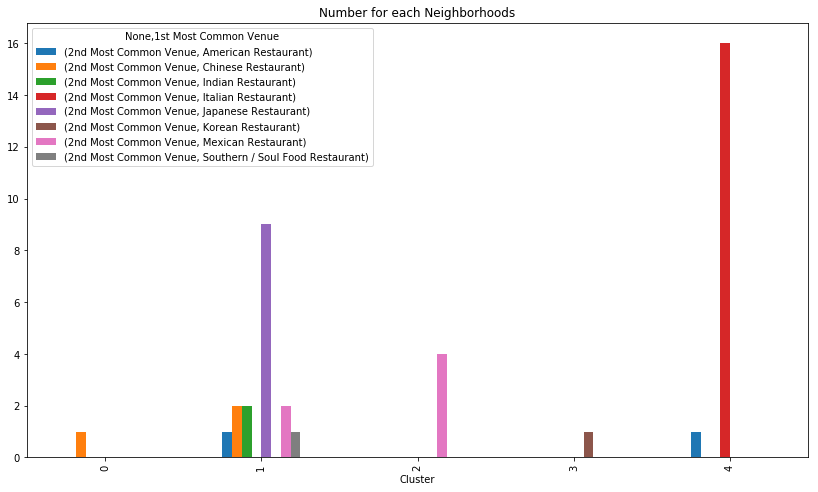

In [48]:
manhattan_merged[['Cluster','1st Most Common Venue','2nd Most Common Venue']].groupby(['1st Most Common Venue','Cluster']).count().unstack(0).plot.bar(title="Number for each Neighborhoods",figsize=(14,8) )

In [53]:
manhattan_merged.loc[manhattan_merged['Cluster'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,American Restaurant,Vietnamese Restaurant,Japanese Restaurant,Malay Restaurant,Thai Restaurant,Italian Restaurant,New American Restaurant,Spanish Restaurant,Austrian Restaurant


In [54]:
manhattan_merged.loc[manhattan_merged['Cluster'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Hamilton Heights,Mexican Restaurant,Japanese Restaurant,Ethiopian Restaurant,Spanish Restaurant,Caribbean Restaurant,Chinese Restaurant,American Restaurant,Italian Restaurant,Southern / Soul Food Restaurant,Indian Restaurant
5,Manhattanville,Mexican Restaurant,Italian Restaurant,American Restaurant,Japanese Restaurant,Chinese Restaurant,Southern / Soul Food Restaurant,Indian Restaurant,French Restaurant,Cuban Restaurant,Mediterranean Restaurant
6,Central Harlem,Southern / Soul Food Restaurant,African Restaurant,American Restaurant,Japanese Restaurant,French Restaurant,Mexican Restaurant,Chinese Restaurant,Tapas Restaurant,Caribbean Restaurant,Indian Restaurant
11,Roosevelt Island,Japanese Restaurant,Greek Restaurant,Chinese Restaurant,Mexican Restaurant,Caribbean Restaurant,Vegetarian / Vegan Restaurant,Cuban Restaurant,French Restaurant,Cambodian Restaurant,Fast Food Restaurant
15,Midtown,Japanese Restaurant,American Restaurant,Cuban Restaurant,Indian Restaurant,Mediterranean Restaurant,Chinese Restaurant,Italian Restaurant,Turkish Restaurant,Falafel Restaurant,Szechuan Restaurant
16,Murray Hill,Japanese Restaurant,Chinese Restaurant,French Restaurant,Italian Restaurant,Jewish Restaurant,American Restaurant,Cuban Restaurant,Mediterranean Restaurant,Peruvian Restaurant,Hawaiian Restaurant
19,East Village,Japanese Restaurant,Chinese Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Vietnamese Restaurant,Tapas Restaurant,Caribbean Restaurant,Moroccan Restaurant,Filipino Restaurant
20,Lower East Side,Japanese Restaurant,Mexican Restaurant,Chinese Restaurant,Italian Restaurant,Southern / Soul Food Restaurant,Mediterranean Restaurant,Venezuelan Restaurant,Greek Restaurant,French Restaurant,Filipino Restaurant
22,Little Italy,Chinese Restaurant,Italian Restaurant,Thai Restaurant,Mediterranean Restaurant,Japanese Restaurant,French Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Falafel Restaurant
25,Manhattan Valley,Indian Restaurant,Mexican Restaurant,Chinese Restaurant,Italian Restaurant,Thai Restaurant,Peruvian Restaurant,Vietnamese Restaurant,Israeli Restaurant,Japanese Restaurant,Korean Restaurant


In [60]:
manhattan_merged.loc[manhattan_merged['Cluster'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Mexican Restaurant,Japanese Restaurant,Thai Restaurant,Cuban Restaurant,Spanish Restaurant,Greek Restaurant,Caribbean Restaurant,Italian Restaurant,Tapas Restaurant,American Restaurant
2,Washington Heights,Mexican Restaurant,Spanish Restaurant,Tapas Restaurant,Chinese Restaurant,Japanese Restaurant,New American Restaurant,Middle Eastern Restaurant,Cuban Restaurant,Italian Restaurant,American Restaurant
3,Inwood,Mexican Restaurant,Spanish Restaurant,Japanese Restaurant,Chinese Restaurant,Mediterranean Restaurant,American Restaurant,Venezuelan Restaurant,Tapas Restaurant,Falafel Restaurant,Fast Food Restaurant
7,East Harlem,Mexican Restaurant,Thai Restaurant,Chinese Restaurant,Moroccan Restaurant,Spanish Restaurant,Cuban Restaurant,Hawaiian Restaurant,French Restaurant,Fast Food Restaurant,Indian Restaurant


In [59]:
manhattan_merged.loc[manhattan_merged['Cluster'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Midtown South,Korean Restaurant,Japanese Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Persian Restaurant,Chinese Restaurant,New American Restaurant,Italian Restaurant,Austrian Restaurant,Ethiopian Restaurant


In [61]:
manhattan_merged.loc[manhattan_merged['Cluster'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Upper East Side,Italian Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Japanese Restaurant,Mexican Restaurant,Mediterranean Restaurant,Turkish Restaurant,Spanish Restaurant,Chinese Restaurant
9,Yorkville,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Thai Restaurant,Chinese Restaurant,Vietnamese Restaurant,Greek Restaurant,German Restaurant,French Restaurant,Peruvian Restaurant
10,Lenox Hill,Italian Restaurant,Japanese Restaurant,Thai Restaurant,Mexican Restaurant,Afghan Restaurant,Chinese Restaurant,Greek Restaurant,French Restaurant,Middle Eastern Restaurant,English Restaurant
12,Upper West Side,Italian Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,American Restaurant,Japanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Thai Restaurant,Chinese Restaurant,Peruvian Restaurant
13,Lincoln Square,Italian Restaurant,French Restaurant,American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Hunan Restaurant,Himalayan Restaurant,Hawaiian Restaurant,Greek Restaurant,English Restaurant
14,Clinton,Italian Restaurant,American Restaurant,Chinese Restaurant,New American Restaurant,Japanese Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Peruvian Restaurant,French Restaurant
17,Chelsea,Italian Restaurant,American Restaurant,Chinese Restaurant,Japanese Restaurant,Tapas Restaurant,French Restaurant,Israeli Restaurant,Vegetarian / Vegan Restaurant,Paella Restaurant,Indian Restaurant
18,Greenwich Village,Italian Restaurant,Japanese Restaurant,American Restaurant,Indian Restaurant,Caribbean Restaurant,French Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Falafel Restaurant
21,Tribeca,American Restaurant,Italian Restaurant,Greek Restaurant,French Restaurant,Chinese Restaurant,Japanese Restaurant,Korean Restaurant,Modern European Restaurant,New American Restaurant,Indian Restaurant
23,Soho,Italian Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,French Restaurant,American Restaurant,Tapas Restaurant,Australian Restaurant,Spanish Restaurant,Mexican Restaurant


In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [64]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters